## Bootcamp: Ciencia de Datos e Inteligencia Artificial
## Proyecto del Módulo 5: Aprendizaje profundo con redes neuronales
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 5! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicarás los conocimientos que has adquirido sobre redes neuronales a contextos de la vida real.
- Puntuarás la precisión y valor de los modelos creados.
- Generarás gráficas que muestren la evolución de la precisión de los modelos.

> NOTA: El modelo se entrena en inglés, así que si quieres traducir estas noticias para comprenderlas mejor te puedes apoyar en herramientas como Google Translate, pero recuerda usar el texto en inglés para tu modelo.



# Parte 1

La propagación de *fake news* o noticias falsas se incrementó a partir de la pandemia por COVID-19. Estas son un problema alarmante porque hacen que las personas realicen actividades que normalmente no llevarían a cabo o que actúen de manera caótica. Un ejemplo es [-> esta noticia <-](https://drive.google.com/file/d/1PrfN83Fm1ib5mHYN6SULVe9CJVECUNn2/view?usp=share_link), en la que se relata cómo notas falsas acerca del daño que ocasiona la 5G al cuerpo provocaron que muchas personas en el Reino Unido quemaran torres de telecomunicaciones aun sin ser estas de 5G.

A ti, como persona experta en redes neuronales, te han encargado hacer un predetector de noticias falsas para los *fact-checker* del mundo.

Para realizarlo, tienes a tu disposición el siguiente *dataset*: https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

## Criterios de evaluación
- Utiliza Keras para entrenar un modelo de *Deep Learning* que ayude a detectar una noticia falsa. Recuerda hacer la limpieza de datos y el análisis exploratorio correspondiente para obtener el puntaje completo (2 puntos).
  - Pista: Revisa esto -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
- Determina el número de épocas a usar y explica por escrito por qué llegaste a esta conclusión. Si no hay explicación, no hay un punto (2 puntos).
- Calcula la precisión y pérdida del modelo (1 punto) y grafícalo a través de las épocas (1 punto).
- Prueba tu modelo con esta noticia falsa: https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/
- Prueba tu modelo con esta noticia verdadera: https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/ (2 puntos por ambas comprobaciones).

## Punto extra
- Usa PyTorch para el entrenamiento.



# Instalación paquete Tensorflow y scipy

In [1]:
# Instalacíon paquetes en nuestro entorno
!pip install scipy
!pip install tensorflow

# Bibliotecas de librerias a ocupar

In [205]:
# Importamos las librerias necesarias para nuestro proyecto
# ==============================================================================

# #librerias necesarias para tratamiento y manejo de datos numéricos.
# ==============================================================================
import pandas     as pd
import numpy      as np
from numpy        import vstack
from pandas       import read_csv
import tensorflow as tf
#importamos las librerias necesarias para Gráficos
# ==============================================================================
import seaborn    as sns
import matplotlib.pyplot as plt
import keras
import gc
import pickle
# Preprocesado y modelado
# scikit-learn - keras - tensorflow
# ==============================================================================
from sklearn.model_selection      import train_test_split
from sklearn.preprocessing        import LabelEncoder
from keras.preprocessing.text     import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras             import Sequential
from tensorflow.keras.layers      import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras             import activations, optimizers, losses


from sklearn.preprocessing   import LabelEncoder
from sklearn.metrics  import accuracy_score

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore", message="Attempting to set identical")
# Ignorar todas las advertencias (no se recomienda en la mayoría de los casos)
warnings.filterwarnings('ignore')


In [206]:
# Conectamos acceso a nuestro drive cuenta de google
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [254]:
# Importar datos a analizar
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto/WELFake_Dataset.csv')

# Análisis de Datos Exploratorio (EDA)

In [255]:
# Revisamos una vista de nuestro archivo a analisar como esta compuesto en su encabezado
df.head(5)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [256]:
# Revisamos una vista del final de nuestro archivo
df.tail(5)

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [257]:
# Vemos informacion de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [ ]:
# Tenemos 72134 datos en nuestro archivo csv

In [258]:
# obtenemos el número de valores únicos en cada columna
df.nunique()

Unnamed: 0    72134
title         62347
text          62718
label             2
dtype: int64

In [259]:
# Revisamos la cantidad de noticias falsas y reales
df['label'].value_counts()

1    37106
0    35028
Name: label, dtype: int64

In [ ]:
# 37106 noticias real (1)
# 35028 noticias falsa (0)

In [260]:
# La función value_counts() cuenta la cantidad de veces que cada valor único aparece en la columna 'label'.
# El argumento normalize=True hace que value_counts() devuelva las proporciones (en lugar de las cantidades) de valores únicos.
# Al multiplicar por 100, convertimos estas proporciones en porcentajes.
porcentaje = df['label'].value_counts(normalize=True) * 100
print(porcentaje)

1    51.440375
0    48.559625
Name: label, dtype: float64


In [ ]:
# Tenemos leve inclinacion de datos a noticias reales

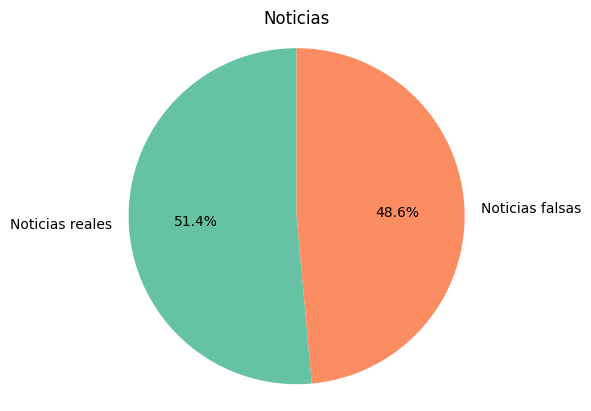

In [261]:
# Gráfico de torta representa nuestros datos dividido en 2 opciones de noticias
new_real = df["label"].sum()
# contratados = df['Contratado'].value_counts()
new_fake = len(df) - new_real

# Lista de valores y etiquetas
sizes = [new_real, new_fake]
labels = ['Noticias reales', 'Noticias falsas']
colors = sns.color_palette("Set2")
# Crear el gráfico de torta
fig, ax = plt.subplots()

# tipo de gráfico
ax.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)
ax.axis("equal")
ax.set_title("Noticias")

# Mostrar el gráfico
plt.show()

In [ ]:
# reduciremos nuestros datos del df para poder realizar nuestro modelo, ya que por recursos no se podrá procesar por la cantidad de datos
# Tomaremos las 200 primeras entradas de noticias

In [262]:
# Busco la fila 200 de datos
# Encuentra la fila donde 'Unnamed: 0' es igual a 200
fila = df.loc[df['Unnamed: 0'] == 200]

# Imprime la fila
print(fila)

     Unnamed: 0                                              title  \
200         200  Court orders Nigeria to pay $288 million to 19...   

                                                  text  label  
200  ABUJA (Reuters) - A court on Monday ordered Ni...      0  


In [263]:
# Dimensiono df a los 100 primeros ingresos de noticias
# Encuentra las filas donde 'Unnamed: 0' está entre 0 y 100
df = df.loc[(df['Unnamed: 0'] >= 0) & (df['Unnamed: 0'] <= 200)]
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
196,196,Russia warns it is close to retaliating after ...,MOSCOW (Reuters) - Russia said it had repeated...,0
197,197,‘Liberal Media’ Scrubs Clip Of Chuck Todd Say...,We often hear about the liberal media s atte...,1
198,198,ONE HILARIOUS TWEET Perfectly Sums Up How Irre...,Nunes dropped a bombshell that Obama admin spi...,1
199,199,"More than 100 dead in Philippine mudslides, fl...",MANILA (Reuters) - A tropical storm in the sou...,0


In [264]:
# Vemos informacion de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  201 non-null    int64 
 1   title       197 non-null    object
 2   text        201 non-null    object
 3   label       201 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 7.9+ KB


In [265]:
# obtenemos el número de valores únicos en cada columna
df.nunique()

Unnamed: 0    201
title         197
text          200
label           2
dtype: int64

In [266]:
# Revisamos la cantidad de noticias falsas y reales
df['label'].value_counts()

1    108
0     93
Name: label, dtype: int64

In [267]:
# Veo % de noticias reales y falsas
# La función value_counts() cuenta la cantidad de veces que cada valor único aparece en la columna 'label'.
# El argumento normalize=True hace que value_counts() devuelva las proporciones (en lugar de las cantidades) de valores únicos.
# Al multiplicar por 100, convertimos estas proporciones en porcentajes.
porcentaje = df['label'].value_counts(normalize=True) * 100
# Imprimo el porcentaje
print(porcentaje)

1    53.731343
0    46.268657
Name: label, dtype: float64


In [ ]:
# Tenemos leve inclinación de nuestros datos a noticias reales, al igual que nuestro archivo con el 100% de datos, será una muestra representativa

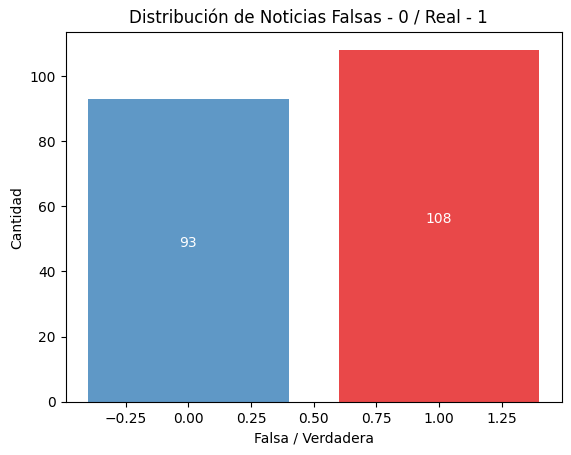

In [268]:
# Gráficamos la cantidad de noticias

# Obténemos la cantidad de las etiquetas de la columna label
label_counts = df['label'].value_counts()

# Define los nombres y los valores para las barras
names = label_counts.index
values = label_counts.values

# Titulo
plt.title("Distribución de Noticias Falsas - 0 / Real - 1  ")
# Nombre eje X
plt.xlabel('Falsa / Verdadera')
# Nombre eje y
plt.ylabel('Cantidad')


# Obtén los colores de la paleta Set1
colors = sns.color_palette("Set1", len(names))

# Crea el gráfico de barras
plt.bar(names, values, color=colors, alpha=0.8)

# Agrega texto a las barras
for name, value, color in zip(names, values, colors):
    plt.text(name, value / 2, str(value), ha='center', va='bottom', color="white")

# Muestra el gráfico
plt.show()


In [269]:
# Resumen estadístico de los atributos numéricos
df.describe()

,Unnamed: 0,label
count,201.000000,201.000000
mean,100.000000,0.537313
std,58.167861,0.499851
min,0.000000,0.000000
25%,50.000000,0.000000
50%,100.000000,1.000000
75%,150.000000,1.000000
max,200.000000,1.000000


# Limpieza del Dataset

In [270]:
# Reviso los nombres de las columnas
list(df.columns)

['Unnamed: 0', 'title', 'text', 'label']

In [271]:
# No necesitamos la primera columna 0
# Elimina la primera columna (índice 0) usando la función drop
df = df.drop(df.columns[0], axis=1)

In [272]:
# Reviso los nombres de las columnas
list(df.columns)

['title', 'text', 'label']

In [273]:
# muestra la cantidad de valores nulos en cada columna
df.isnull().sum()

title    4
text     0
label    0
dtype: int64

In [274]:
# Eliminamos las filas que tienen valores nulos en la columna 'title'.
# El parámetro 'subset' especifica las columnas a considerar para buscar valores nulos.
df.dropna(subset=['title'], inplace=True)

In [275]:
# muestra la cantidad de valores nulos en cada columna
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

# Completitud y duplicado de archivo

In [276]:
# Calcular el porcentaje de completitud
completitud = df.count().sum() / df.size * 100

# Encontrar las filas duplicadas
cantidad_filas_duplicadas = df.duplicated().sum()
#print(f'Cantidad de filas duplicadas: {cantidad_filas_duplicadas}')

# Imprimir el porcentaje de completitud y la cantidad de filas duplicadas
print(f"El porcentaje de completitud es: {completitud:.2f}%")
# print(f"Cantidad de filas duplicadas: {cantidad_filas_duplicadas}")

colum_dupli = df.columns[df.columns.duplicated(keep=False)]
if any(colum_dupli):
  print(f"las columnas duplicadas son: {list(colum_dupli)}")
else:
  print("No hay columnas duplicadas en nuestro dataframe")

El porcentaje de completitud es: 100.00%
No hay columnas duplicadas en nuestro dataframe


In [ ]:
# Borrar filas duplicadas
# df = df.drop_duplicates()

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 200
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   197 non-null    object
 1   text    197 non-null    object
 2   label   197 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.2+ KB


In [ ]:
# De 201 datos quedamos con 197

In [278]:
# Creamos una nueva columna llamada 'text' que combina el contenido de las columnas 'title' y 'text'.
df['text'] = df['title'] + ' ' + df['text']


In [279]:
# Eliminamos la columna 'title' del DataFrame 'df'.
df.drop('title', axis=1, inplace=True)

In [280]:
df.head(5)

,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
4,SATAN 2: Russia unvelis an image of its terrif...,1
5,About Time! Christian Group Sues Amazon and SP...,1


Trabajaremos con el texto de las noticias de la columna text

In [281]:
# importa la biblioteca Natural Language Toolkit (NLTK)
import nltk
# Este comando descarga el recurso léxico WordNet a través de NLTK. WordNet es una base de datos léxica
# del inglés. Los sustantivos, verbos, adjetivos y adverbios se agrupan en conjuntos de sinónimos cognitivos
# (synsets), cada uno de los cuales expresa un concepto distinto. WordNet se utiliza ampliamente en el
#procesamiento del lenguaje natural y la minería de texto debido a su estructura de red semántica y fácil
# acceso a través de NLTK.
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [282]:
#  importa la biblioteca Natural Language Toolkit (NLTK).
import nltk
# Este comando descarga el conjunto de “stop words” (palabras vacías) a través de NLTK. Las “stop words”
# son palabras que se filtran antes o después del procesamiento del texto. Cuando se construye el vocabulario
# de un modelo de lenguaje, es una buena práctica filtrar las “stop words”, ya que estas palabras no contienen
# mucha información y se usan con mucha frecuencia en el lenguaje (por ejemplo, “el”, “un”, “es”).
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Procesamiento de texto

Se convierte el texto en minuscula, se eliminan números, puntuaciones, espacios

In [283]:
# Proporciona funciones para tareas de procesamiento de texto.
import re
# Lista de palabras vacias que no contienen informacion importante y se eliminan para evitar el ruido en el analisis del texto
from nltk.corpus import stopwords
# Es un paquete que se utiliza pata la lematizacion del texto
from nltk.stem import WordNetLemmatizer

# Inicializa el lematizador
# Se utiliza para reducir las palabras a su forma base o raíz, para facilitar el analisis de texto
lemmatizer = WordNetLemmatizer()

# Define las palabras vacías
stop_words = set(stopwords.words('english'))
# Se crea la función limpieza de texto
def clean_text(text):
    # Convierte el texto a minúsculas
    text = text.lower()

    # Elimina los números
    text = re.sub(r'\d+', '', text)

    # Elimina la puntuación
    text = re.sub(r'\W', ' ', text)

    # Elimina las palabras vacías
    text = ' '.join(word for word in text.split() if word not in stop_words)

    # Lematiza las palabras
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

    return text

# Aplica la función de limpieza a tus datos
df['text'] = df['text'].apply(clean_text)
# Reviso como quedo nuestro archivo ya lematizado
df['text']

0      law enforcement high alert following threat co...
2      unbelievable obama attorney general say charlo...
3      bobby jindal raised hindu us story christian c...
4      satan russia unvelis image terrifying new supe...
5      time christian group sue amazon splc designati...
                             ...                        
196    russia warns close retaliating new u sanction ...
197    liberal medium scrub clip chuck todd saying so...
198    one hilarious tweet perfectly sum irrelevant c...
199    dead philippine mudslide flooding official man...
200    court order nigeria pay million war victim abu...
Name: text, Length: 197, dtype: object

Contabilizamos las palabras del texto, para saber que cantidad de vocabulario tenemos

In [284]:
# Agregamos una nueva columna 'num_words' al DataFrame 'df'.
# Usamos el método 'apply' para aplicar una función a cada fila de la columna 'text'.
# La función lambda x: len(x.split()) divide el texto en palabras y cuenta cuántas palabras hay.

df['num_words'] = df['text'].apply(lambda x: len(x.split()))



In [285]:
# Vemos el archivo como quedo con nuestra nueva columna que muestra la cantidad de palabras que contiene nuestra noticia
df.head(200)

,text,label,num_words
0,law enforcement high alert following threat co...,1,494
2,unbelievable obama attorney general say charlo...,1,35
3,bobby jindal raised hindu us story christian c...,0,752
4,satan russia unvelis image terrifying new supe...,1,197
5,time christian group sue amazon splc designati...,1,153
...,...,...,...
196,russia warns close retaliating new u sanction ...,0,60
197,liberal medium scrub clip chuck todd saying so...,1,241
198,one hilarious tweet perfectly sum irrelevant c...,1,55
199,dead philippine mudslide flooding official man...,0,224


In [286]:
# Encuentra el valor máximo en la columna 'num_words' del DataFrame df
max_value = df['num_words'].max()

# Imprime el valor máximo
print(max_value)


3995


In [287]:
# Encuentra el índice de la fila con el máximo número de palabras
indice_max = df['num_words'].idxmax()

# Muestra la fila con el máximo número de palabras
fila_max = df.loc[indice_max]

print(fila_max)

#fila_max


text         jack heart lucifer temple dog lucifer temple d...
label                                                        1
num_words                                                 3995
Name: 188, dtype: object


In [288]:
# Muestra la fila con el índice 46
fila = df.loc[46]

print(fila)


text         mayday carolina queen new york time seven fish...
label                                                        0
num_words                                                 1501
Name: 46, dtype: object


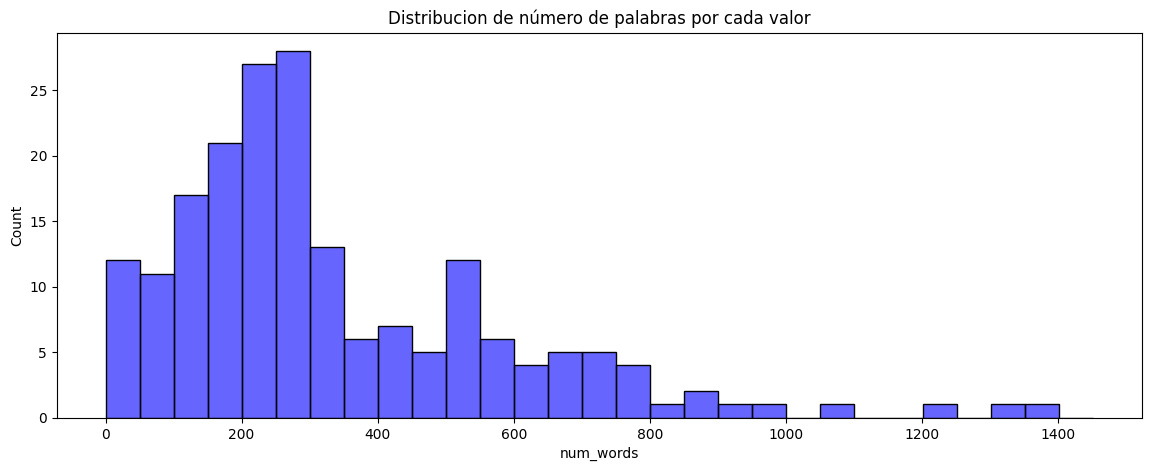

In [289]:
# Grafico de cantidada de palabras
# Tamaño del grafico
plt.figure(figsize = (14,5))
# Histograma (columna de datos, rango de barras, color)
sns.histplot(df['num_words'], bins = range(1, 1501, 50), color = 'b', alpha = 0.6)
# Titulo del grafico
plt.title('Distribucion de número de palabras por cada valor')
plt.show()

In [290]:
# Distribución nuestras variables X (independientes) e Y (dependiente)

X = (df['text']).values
y  = (df['label']).values # Apredecir
print("Variables X ")
print(X)
print(" ")
print("***********************************************************************************************")
print(" ")
print("Variable y ")
print(y)

Variables X 
['law enforcement high alert following threat cop white blacklivesmatter fyf terrorist video comment expected barack obama member fyf fukyoflag blacklivesmatter movement called lynching hanging white people cop encouraged others radio show tuesday night turn tide kill white people cop send message killing black people america one f yoflag organizer called sunshine radio blog show hosted texas called sunshine f ing opinion radio show snapshot fyf lolatwhitefear twitter page p show urging supporter call fyf tonight continue dismantle illusion white snapshot twitter radio call invite fyfthe radio show aired p eastern standard time show caller clearly call lynching killing white people minute clip radio show heard provided breitbart texas someone would like referred hannibal already received death threat result interrupting fyf conference call unidentified black man said mother f kers start f ing like u bunch ni er takin one u roll said cause already roll gang anyway six seven

# Division de dataset - tokenizer

In [291]:
# Creamos una instancia de Tokenizer contamos las palabras únicas en la columna 'text'
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])

# El atributo word_index contiene un diccionario de palabras y sus índices
num_unique_words = len(tokenizer.word_index)

print('Número total de palabras únicas:', num_unique_words)


Número total de palabras únicas: 12414


In [292]:
from sklearn.model_selection import train_test_split
# Dividimos nuestros datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [293]:
# Dimensiones de X
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(197,)
(157,)
(40,)


In [294]:
# Importamos la clase Tokenizer de Keras, que se utiliza para tokenizar texto.
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Creamos una instancia de Tokenizer con un límite de 10000 palabras más frecuentes.
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

# Ajustamos el Tokenizer a los textos de la columna X_train y X_test
X_train = tokenizer.texts_to_sequences(X_train) # df['text'].values
X_test = tokenizer.texts_to_sequences(X_test)

print(X_train)
print(" ")

print(X_test)


[[1837, 2507, 3908, 2123, 2124, 136, 5607, 696, 50, 2508, 2509, 1837, 2507, 3908, 374, 160, 615, 696, 12], [2, 5608, 512, 1139, 697, 512, 31, 375, 123, 79, 6, 8, 52, 2, 616, 118, 376, 5609, 512, 62, 260, 1139, 423, 141, 2510, 617, 27, 5610, 18, 2125, 1140, 31, 375, 964, 18, 123, 698, 5611, 31, 2511, 1580, 1401, 1268, 322, 2, 616, 833, 647, 1, 964, 136, 55, 80, 238, 250, 512, 1402, 18, 2126, 2512, 375, 512, 452, 31, 337, 224, 964, 3909, 3910, 512, 1139, 17, 2513, 2125, 3059, 47, 1030, 483, 375, 512, 31, 167, 484, 3060, 5612, 1, 647, 2127, 2, 699, 6, 90, 49, 276, 1139, 3911, 3912, 2514, 1838, 834, 2515, 3913, 2516, 11, 547, 109, 5613, 79, 1031, 700, 11, 2514, 760, 161, 4, 5614, 1581, 68, 701, 133, 423, 2, 94, 2517, 647, 2128, 1403, 453, 377, 2129, 3061, 18, 3062, 42, 1032, 2, 647, 107, 2130, 3914, 5615, 2131, 2518, 964, 1, 2132, 5616, 648, 1582, 5617, 3915, 85, 2519, 2, 378, 239, 1404, 3916, 6, 3917, 323, 1141, 3918, 1583, 3919, 2520, 7, 251, 260, 141, 2133, 277, 1033, 1584, 1405, 95, 8,

In [295]:
# Establece la longitud máxima de la secuencia. Cualquier secuencia más larga que esta será truncada.
max_sequence_length = 500

# Rellena las secuencias en el conjunto de entrenamiento para asegurar que todas tengan la misma longitud.
# Las secuencias que son más cortas que `max_sequence_length` se rellenan con ceros al final.
X_train = pad_sequences(X_train, maxlen=max_sequence_length)

# De manera similar, rellena las secuencias en el conjunto de prueba.
X_test = pad_sequences(X_test, maxlen=max_sequence_length)


# Creamos el modelo a ocupar de nuestra red neuronal recurrente (RNN)

In [296]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dense

# Definición del modelo y modo ejecución
model = Sequential()

# Añade una capa entrada de incrustación (Embedding) que convierte los índices de palabras en vectores densos de tamaño fijo.
# Esta capa toma como entrada un entero y devuelve un vector lleno de valores.

# 10000 indica el tamaño del vocabulario en las secuencias de entrada.
# 128 es la dimensión de los vectores de salida lleno de valores.
# input_length es la longitud de las secuencias de entrada.
model.add(Embedding(10000, 128, input_length=max_sequence_length))

# Añade una capa intermedia LSTM con 128 unidades de memoria.
model.add(LSTM(128))

# Añade una capa salida donde la función de activación es la sigmoid en forma de s
model.add(Dense(1, activation='sigmoid'))

# Compilación del modelo
# binary_crossentropy (pérdida de entropía cruzada binaria) es la función de pérdida a optimizar. Es adecuada para clasificación binaria.
# adam es el optimizador a utilizar.
# accuracy es la métrica de evaluación a utilizar.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Imprime un resumen representativo del modelo.
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1411713 (5.39 MB)
Trainable params: 1411713 (5.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Entrenamiento del modelo

Calculamos la pérdida total al final de cada epoch, para saber en cuantas epocas es mejor para entrenar el modelo

In [297]:
# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)

# Imprimir la pérdida al final de cada época
for epoch in range(len(history.history['loss'])):
   # if epoch % 10 == 0:
        print("Epoch %d perdida: %.3f" % (epoch, history.history['loss'][epoch]))


Epoch 0 perdida: 0.690
Epoch 1 perdida: 0.674
Epoch 2 perdida: 0.640
Epoch 3 perdida: 0.546
Epoch 4 perdida: 0.778
Epoch 5 perdida: 0.407
Epoch 6 perdida: 0.379
Epoch 7 perdida: 0.319
Epoch 8 perdida: 0.240
Epoch 9 perdida: 0.153


In [298]:
# Entrenar el modelo
# Número de epocas a utilizar es lo mas recomendado según nuestra busqueda
num_epochs = 10
history = model.fit(X_train, y_train, epochs=num_epochs, validation_data=(X_test, y_test))

Epoch 1/10
5/5 [==============================] - 2s 364ms/step - loss: 0.0695 - accuracy: 1.0000 - val_loss: 0.8058 - val_accuracy: 0.6500
Epoch 2/10
5/5 [==============================] - 1s 151ms/step - loss: 0.0310 - accuracy: 0.9936 - val_loss: 0.9275 - val_accuracy: 0.6250
Epoch 3/10
5/5 [==============================] - 1s 142ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.9604 - val_accuracy: 0.6250
Epoch 4/10
5/5 [==============================] - 1s 137ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.9640 - val_accuracy: 0.7000
Epoch 5/10
5/5 [==============================] - 1s 140ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.0034 - val_accuracy: 0.7250
Epoch 6/10
5/5 [==============================] - 1s 138ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 1.0647 - val_accuracy: 0.7250
Epoch 7/10
5/5 [==============================] - 1s 132ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 1.0760 - val_accuracy: 0.7250
Epoch 8/10
5/5 [====

# Evaluación del modelo

In [299]:
# Evaluamos el modelo
# Perdida y presición
loss, accuracy = model.evaluate(X_test, y_test)
print('Presición Test: %.3f' % accuracy)
print('Pérdida Test: %.3f' % loss)

2/2 [==============================] - 0s 17ms/step - loss: 1.1141 - accuracy: 0.7500
Presición Test: 0.750
Pérdida Test: 1.114


In [ ]:
# El modelo fue capaz de predecir de cada 100 predicciones que el modelo hizo en los datos de prueba, 75 fueron correctas.
# Nuestro modelo ocupando pérdida de entropía cruzada binaria, este valor se encuentra entre 0 y 1, donde 0 indica que las predicciones del modelo se alinean perfectamente con los verdaderos resultados,
# y 1 indica lo contrario. Por lo tanto, este modelo tiene cierto margen de mejora en términos de minimizar la pérdida 1.114
# Debería estar más cerca del 0 para tener mejopres resultados

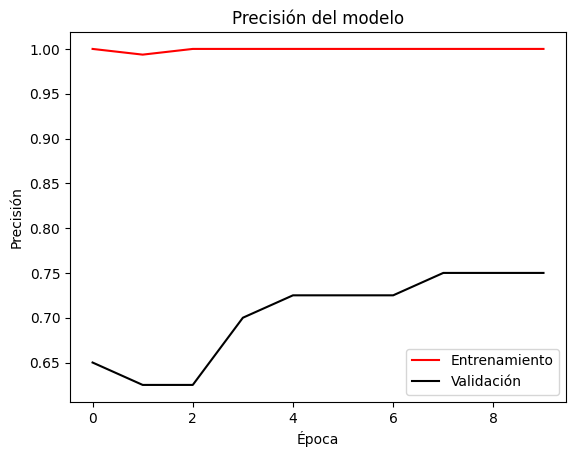

In [300]:
# Graficamos la Precisión del modelo

# Precision de conjunto entrenamiento color rojo
plt.plot(history.history['accuracy'], color="red")
# Presicion de conjunto de validacion color negro
plt.plot(history.history['val_accuracy'], color="black")

# Titulo gr´pafico
plt.title('Precisión del modelo')
# Titulo ejes
plt.ylabel('Precisión')
plt.xlabel('Época')
# Legenda
plt.legend(['Entrenamiento', 'Validación'], loc='lower right')
plt.show()

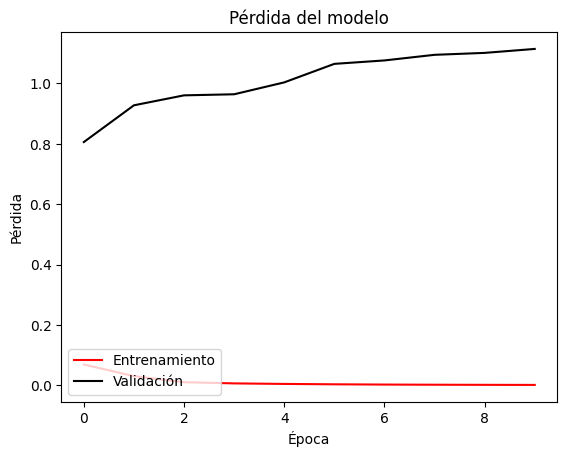

In [302]:
# Pérdida del módelo

# perdida en conjunto de entrenamiento
plt.plot(history.history['loss'], color="red")
# perdida en conjuto de validacion
plt.plot(history.history['val_loss'], color="black")

# Titulo gráfico
plt.title('Pérdida del modelo')
# Titulo ejes
plt.ylabel('Pérdida')
plt.xlabel('Época')
# Titulo legenda
plt.legend(['Entrenamiento', 'Validación'], loc='lower left')
plt.show()

# Probaremos el modelo con 2 noticias 1 falsa y otra verdadera

Noticia Falsa de origen, veremos si nuestro modelo la cataloga como falsa.

In [ ]:
# Tenemos encuenta que los datos que tenemos estaban cargado a noticias verdaderas, podremos predecir 75% de precision

In [303]:
# Importa el módulo requests, que permite enviar solicitudes HTTP en Python.
import requests

# Importa BeautifulSoup desde bs4. BeautifulSoup es una biblioteca de Python para extraer datos de archivos
# HTML y XML.
from bs4 import BeautifulSoup

# Link y Scrapping
# alojamos los datos en la variable url
url = 'https://www.breitbart.com/politics/2016/09/10/exposed-fbi-director-james-comeys-clinton-foundation-connection/'

# requests.get() sirve para enviar una solicitud GET a la URL especificada y guarda la respuesta en una
# variable llamada response.
response = requests.get(url)
# Extrae el contenido de la respuesta con response.content y lo guarda en una variable llamada html.
html = response.content

In [304]:
# Scraping :es la técnica utilizada para extraer información de sitios web.
# Se realiza al hacer una solicitud a una URL específica y luego analizar el HTML de la página
# para obtener los datos necesarios.


# Crea un objeto BeautifulSoup, que representa el documento HTML como una estructura de datos anidada.
# El primer argumento para el constructor BeautifulSoup es una cadena de caracteres o un objeto de archivo
# que representa el documento a analizar. En este caso, 'html' es el contenido HTML de la página web que has obtenido previamente.
# El segundo argumento, 'html.parser', es el analizador que BeautifulSoup usa para analizar el documento.
# 'html.parser' es el analizador HTML incluido en la biblioteca estándar de Python, adecuado para la mayoría de los documentos HTML.
soup = BeautifulSoup(html, 'html.parser')


# Utiliza el método get_text() en el objeto BeautifulSoup para extraer todo el texto del documento HTML.
# Este método devuelve una cadena de caracteres que contiene todo el texto en el documento HTML.
# Todos los tags HTML son eliminados y solo se conserva el texto.
news_text = soup.get_text()

# Tokenizar noticia
# convertimos el texto en una secuencia de enteros
news_sequence = tokenizer.texts_to_sequences([news_text])

# Nos asegurarnos de que todas las secuencias tengan la misma longitud
# Rellena las secuencias más cortas con ceros al final.
news_sequence = pad_sequences(news_sequence, maxlen=max_sequence_length)

# Aplicar predicción con el Modelo
prediction = model.predict(news_sequence)
# Si la predicción es mayor o igual a 0.5, la etiqueta predicha será 'Verdadera' = 1
# De lo contrario, la etiqueta predicha será 'Falsa' = 0
predicted_label = 'Falsa' if prediction < 0.5 else 'Verdadera'

print('Predicción:', predicted_label)


1/1 [==============================] - 0s 332ms/step
Predicción: Verdadera


In [ ]:
# Nuestro modelo entrenado dio como resultado noticia Verdadera.( Falsa de origen)
# Incorrectamente clásificada
# Tengamos encuenta que nuestros datos de origen y cuando los redujimos siempre tuvieron tendencia a más noticias verdaderas.

Noticia verdadera de origen, como nuestro sistema la cataloga

In [305]:
# Link y Scrapping
# alojamos los datos en la variable url
url = 'https://www.washingtonpost.com/sports/2022/11/14/world-cup-female-referee-kathryn-nesbitt/'
# requests.get() sirve para enviar una solicitud GET a la URL especificada y guarda la respuesta en una
# variable llamada response.
response = requests.get(url)
# Extrae el contenido de la respuesta con response.content y lo guarda en una variable llamada html.
html = response.content

In [306]:
# Scraping
soup = BeautifulSoup(html, 'html.parser')
# extraer todo el texto del documento HTM, devuelve una lista de caracteres, todos los tags se eliminan
news_text = soup.get_text()

# Tokenizar noticia
news_sequence = tokenizer.texts_to_sequences([news_text])
news_sequence = pad_sequences(news_sequence, maxlen=max_sequence_length)

# Aplicar predicción con el Modelo
prediction = model.predict(news_sequence)

# Si la predicción es mayor o igual a 0.5, la etiqueta predicha será 'Verdadera' = 1
# De lo contrario, la etiqueta predicha será 'Falsa' = 0
predicted_label = 'Veradera' if prediction >= 0.5 else 'Falsa'

print('Predicción:', predicted_label)

1/1 [==============================] - 0s 47ms/step
Predicción: Veradera


In [117]:
# Nuestro modelo entrenado dio como resultado noticia verdadera.( verdadera de origen)
# Acertó correctamente
# Tengamos encuenta que nuestros datos de origen y cuando los redujimos siempre tuvieron tendencia a más noticias verdaderas.

# Matriz de confusión

2/2 [==============================] - 0s 15ms/step


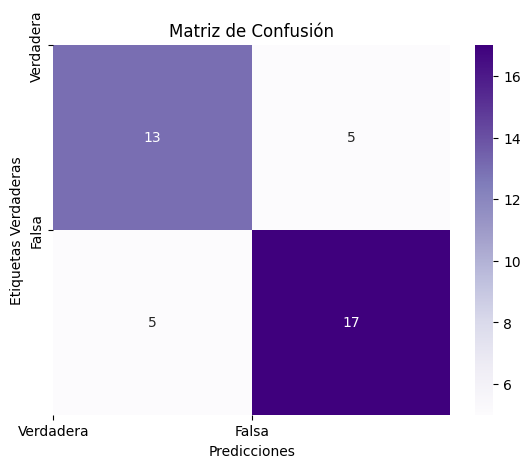

In [307]:
from sklearn.metrics import confusion_matrix

# Predicciones del modelo para la matriz
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Necesario paralas probabilidades a etiquetas binarias

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualización de la matriz
labels = ['Verdadera', 'Falsa']
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
# Titulo
plt.title('Matriz de Confusión')
# Ejes
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
plt.show()

In [308]:
# Aplanamiento de valores de matriz y su cálculo con fórmula
tn, fp, fn, tp = cm.ravel()
print("Teniendo como resultado de nuestra matriz:" )
print("verdaderos negativos :", tn)
print("falsos positivos :", fp)
print("falsos negativos :", fn)
print("verdaderos positivos :", tp)
print("==================")
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Precisión:', accuracy)

Teniendo como resultado de nuestra matriz:
verdaderos negativos : 13
falsos positivos : 5
falsos negativos : 5
verdaderos positivos : 17
Precisión: 0.75


In [ ]:
# La precisión del modelo es de 0.75, lo que significa que el 75% de las predicciones del modelo fueron correctas.
# Esto indica que el modelo tiene un rendimiento relativamente bueno, pero aún hay margen de mejora, ya que no todas
# las predicciones fueron correctas.

# Parte 2
Se acerca el fin de año y con ello la necesidad de realizar los balances generales, estados financieros, etc. Una empresa te contrata para capturar manualmente todos sus recibos de ventas, solo que hay un pequeño problema: todos están hechos a mano, por lo que sería muy tardado ver recibo tras recibo y capturarlos de forma manual.

Sin embargo, recuerdas que aprendiste acerca de las redes neuronales convolucionales. Por ello, decides hacer un modelo que afronte este problema con Inteligencia Artificial y que convierta la escritura a mano en caracteres.

Tienes el *dataset* de dígitos escritos a mano de Mnist a tu disposición:
https://www.tensorflow.org/datasets/catalog/mnist , que puedes invocar de esta manera:


```python
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

```

## Criterios de evaluación
- Entrena el modelo utilizando Tensorflow y todas las capas que creas necesarias. Explica por qué elegiste esas capas. Si no hay explicación, se invalida un punto (2 puntos).
- Grafica la evolución de la pérdida y la precisión del entrenamiento y genera un conjunto de 10 predicciones con los mismos datos del *dataset* (2 puntos).


¡Éxito! Te vemos en el contenido del siguiente módulo.

In [ ]:
# #librerias necesarias para tratamiento y manejo de datos numéricos.
# ==============================================================================
import numpy as np

#importamos las librerias necesarias para Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# keras - tensorflow
# ==============================================================================
from tensorflow import keras

In [ ]:
# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# Normalizar los datos de entrada

# las imágenes suelen estar en formato de 8 bits por canal (rojo, verde, azul).
# Esto significa que los valores de los píxeles pueden variar de 0 a 255. Al dividir todos los píxeles
# por 255, los datos se normalizan para tener un rango entre 0 y 1.

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Crear una dimensión

# La función np.expand_dims se utiliza para expandir la forma del array. Añade una nueva dimensión en la posición -1 , al final del array.
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Modelo
# Modelo se ejecutara de manera sequencial
model = keras.Sequential([
    # Capa de entrada modelo de red neuronal convolucional
    # 32 tamaño de imagenes
    # 3 x 3 son los pixeles
    # activacion a ocupar relu
    # define datos de entrada 28x28 píxeles con 1 canal de color (escala de grises)
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    # Reducimos dimensión de imagen de 2x2 a 1x1
    keras.layers.MaxPooling2D((2, 2)),
    # Segunda capa convolucional, similar a la primera pero con 64 filtros.
    # 64 tamaño de imagenes
    # 3 x 3 son los pixeles
    # activacion a ocupar relu
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Reducimos dimensión de imagen de 2x2 a 1x1
    keras.layers.MaxPooling2D((2, 2)),
    # Esta capa aplana la imagen 2D en un vector 1D para poder ser procesada por
    # las siguientes capas densas.
    keras.layers.Flatten(),
    # Capa intermedia 64 neuronas
    # Activacion relu
    keras.layers.Dense(64, activation='relu'),
    # Capa de salida
    # 10 neuronas (10 clases a predecir)
    # Activacion softmax, las salida de la neurona se convierte en probabilidad todas suman 1.
    keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
# optimizacion adam
# perdida entropia cruzada
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
# conjuto de datos train
# 10 epocas lo mejor para el modelo y std
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 14s 4ms/step - loss: 0.1386 - accuracy: 0.9580 - val_loss: 0.0533 - val_accuracy: 0.9834
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.0469 - val_accuracy: 0.9843
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0324 - accuracy: 0.9901 - val_loss: 0.0312 - val_accuracy: 0.9898
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0240 - accuracy: 0.9926 - val_loss: 0.0294 - val_accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0308 - val_accuracy: 0.9902
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0137 - accuracy: 0.9952 - val_loss: 0.0351 - val_accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0106 - accuracy: 0.9970 - val_loss: 0.0440 - val_accuracy

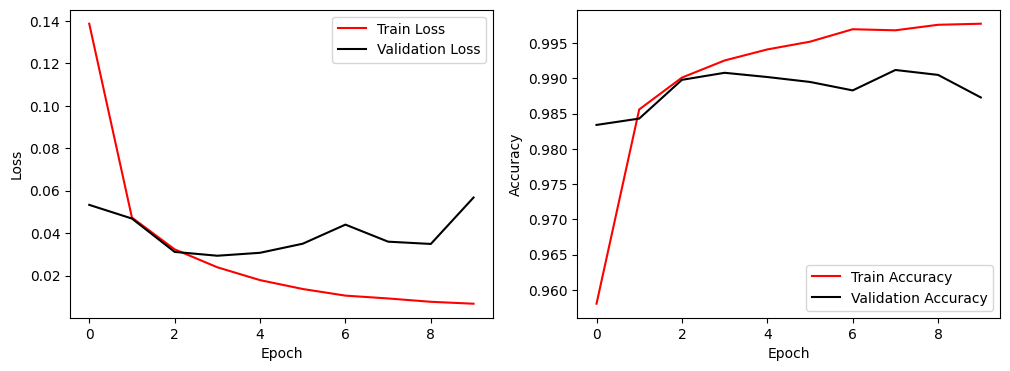

In [ ]:
# Grafica de la evolución de la pérdida y la precisión
# Dimensionamos el gráfico
plt.figure(figsize=(12, 4))
# Posiciones de los subplot
plt.subplot(1, 2, 1)
# perdida en datos de entramiento
plt.plot(history.history['loss'], label='Train Loss', color="red")
# Perdida en conjunto de validacion de datos
plt.plot(history.history['val_loss'], label='Validation Loss', color="black")
# Titulo ejes
plt.xlabel('Epoch')
plt.ylabel('Loss')
# Ubicacion legenda
plt.legend()

# Posiciones de los subplot
plt.subplot(1, 2, 2)
# Presicion de datos de entrenamiento
plt.plot(history.history['accuracy'], label="Train Accuracy", color="red")
# Presicion de datos de conjunto validacion
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color="black")
# Titulo de ejes
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# Ubicacion de legenda
plt.legend()

plt.show()

In [ ]:
# Predicciones con los datos de prueba
num_predictions = 10
# conjunto de datos test toma los primeros elementos del cinjunto de datos
predictions = model.predict(x_test[:num_predictions])

1/1 [==============================] - 0s 17ms/step


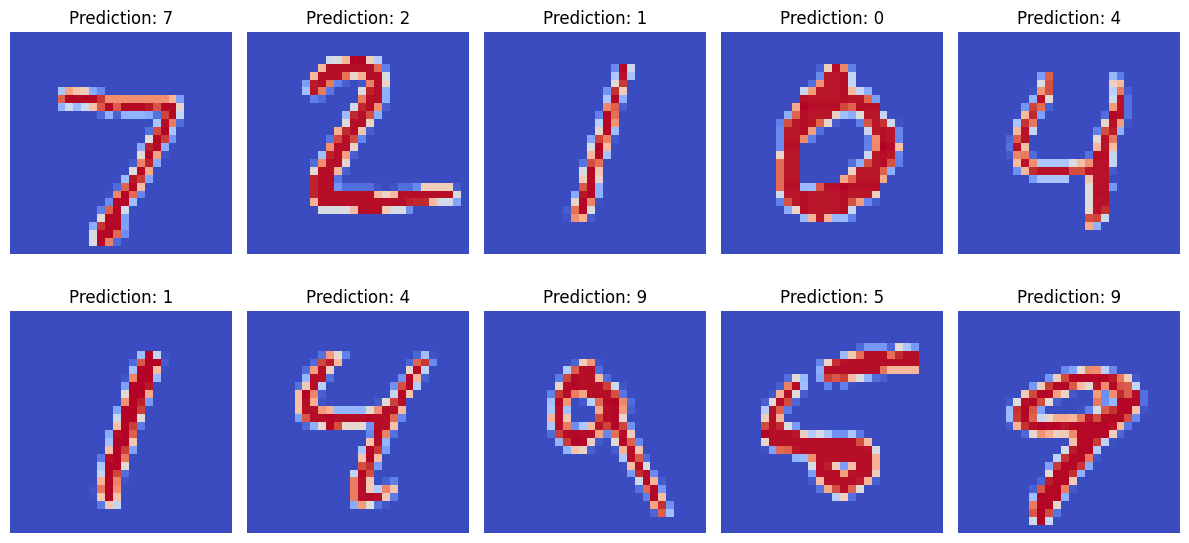

In [ ]:
# Imágenes con predicciones correspondientes
# tamaño de imagenes
plt.figure(figsize=(12, 6))
for i in range(num_predictions):
    # sub graficos
    plt.subplot(2, 5, i+1)
    3 valor y tipo de color de la imagen
    plt.imshow(x_test[i].squeeze(), cmap='coolwarm')
    # Titulo
    plt.title(f"Prediction: {np.argmax(predictions[i])}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import KFold

# Validación cruzada
# dividimos los datos en subconjuntos
num_folds = 5
# en cuantos subconjuntos se dividen
# se mezclan los datos si/no
# genera aleatoriamente resultados reproducibles
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# Listas vacias que se crean y llenaran
fold_losses = []
fold_accuracies = []
# Seleccionamos los datos de entrenamiento y validación para el fold actual utilizando los índices
# generados por kf.split().
for train_index, val_index in kf.split(x_train):
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Entrenamiento con Kfold
    model.fit(x_train_fold, y_train_fold, epochs=10, batch_size=64, verbose=0)

    # evaluación del modelo n los datos de validación del fold actual y almacena la pérdida y la precisión.
    fold_loss, fold_accuracy = model.evaluate(x_val_fold, y_val_fold, verbose=0)
    # añadimos la pérdida y la precisión del fold actual a las listas de pérdidas y precisiones vacias.
    fold_losses.append(fold_loss)
    fold_accuracies.append(fold_accuracy)

In [ ]:
# Comprobar con media y desviación estándar de las métricas de precisión con Kfold
mean_loss = np.mean(fold_losses)
std_loss = np.std(fold_losses)
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print('Mean Loss:', mean_loss)
print('Standard Deviation Loss:', std_loss)
print('Mean Accuracy:', mean_accuracy)
print('Standard Deviation Accuracy:', std_accuracy)

Mean Loss: 0.002017960672674235
Standard Deviation Loss: 0.0020643590242259186
Mean Accuracy: 0.9994166731834412
Standard Deviation Accuracy: 0.0005821455216794359


In [ ]:
# Explicación de valores obtenidos de nuestro modelo:

# Perdida media donde un valor más bajo es mejor.
# Perdida media de 0.002 es un valor muy bajo, indica que el modelo está haciendo un buen trabajo al minimizar la pérdida.

# Desviación Estándar de la Pérdida cuánto varían las pérdidas entre los diferentes folds. Un valor más bajo es mejor
# Desviación Estándar de la Pérdida 0.002 indica que el rendimiento del modelo es consistente entre los diferentes folds.

# Precisión Media s una medida de cuántas predicciones del modelo son correctas. Un valor más alto es mejor
# Precisión Media 0.99 lo que indica que el modelo está haciendo un buen trabajo al hacer predicciones correctas.

# Desviación Estándar de la Precisión Al igual que con la desviación estándar de la pérdida, un valor más bajo es mejor.
# Desviación Estándar de la Precisión 0.0005  indica que la precisión del modelo es consistente entre los diferentes folds.


